# Tuning practice (SVM / RF / XGBoost) - Regression (PRSA data)

### Attribute Information: (PASA_data)

No: row number

year: year of data in this row

month: month of data in this row

day: day of data in this row

hour: hour of data in this row

pm2.5: PM2.5 concentration (ug/m^3)

DEWP: Dew Point (â„ƒ)

TEMP: Temperature (â„ƒ)

PRES: Pressure (hPa)

cbwd: Combined wind direction

Iws: Cumulated wind speed (m/s)

Is: Cumulated hours of snow

Ir: Cumulated hours of rain

## EDA and Data preprocessing

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows',None)

In [5]:
df=pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [6]:
df.head(10)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


In [7]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [8]:
df2=df.dropna() #remove the rows contain any NA.

In [9]:
df2.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,22279.380104,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,12658.168415,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,25.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,11464.000000,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,22435.000000,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,33262.000000,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


In [10]:
df2=df2.reset_index()
df2.head()

,index,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [11]:
type(df2['cbwd'][0])

str

In [12]:
df2.info() #one categorical variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41757 entries, 0 to 41756
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   41757 non-null  int64  
 1   No      41757 non-null  int64  
 2   year    41757 non-null  int64  
 3   month   41757 non-null  int64  
 4   day     41757 non-null  int64  
 5   hour    41757 non-null  int64  
 6   pm2.5   41757 non-null  float64
 7   DEWP    41757 non-null  int64  
 8   TEMP    41757 non-null  float64
 9   PRES    41757 non-null  float64
 10  cbwd    41757 non-null  object 
 11  Iws     41757 non-null  float64
 12  Is      41757 non-null  int64  
 13  Ir      41757 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 4.5+ MB


In [13]:
cbwd_cat = pd.get_dummies(df2['cbwd'])
cbwd_cat.head() #change the categorical variable to dummy variables

,NE,NW,SE,cv
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [14]:
df2 = pd.concat([df2,cbwd_cat],axis=1) #concatenate
df2.head()

,index,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,NE,NW,SE,cv
0,24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,0,0,1,0
1,25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,0,0,1,0
2,26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,0,0,1,0
3,27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,0,0,1,0
4,28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,0,0,1,0


In [15]:
quant_cols=['DEWP','TEMP','PRES','Iws','Is','Ir','pm2.5'] #select quantitative variables
qual_cols=['month','hour','NE','NW','SE','cv'] #select categorical data

In [16]:
corr_df=pd.DataFrame(np.corrcoef(np.array(df2[quant_cols]).T))

In [17]:
corr_df.columns=quant_cols

In [18]:
corr_df.index = quant_cols

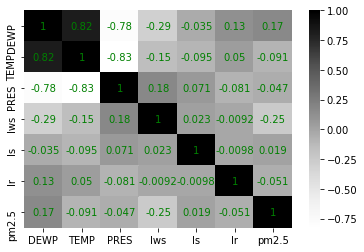

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

In [20]:
corr_df['pm2.5'] #correlation with pm2.5

DEWP     0.171423
TEMP    -0.090534
PRES    -0.047282
Iws     -0.247784
Is       0.019266
Ir      -0.051369
pm2.5    1.000000
Name: pm2.5, dtype: float64

<AxesSubplot:xlabel='month', ylabel='pm2.5'>

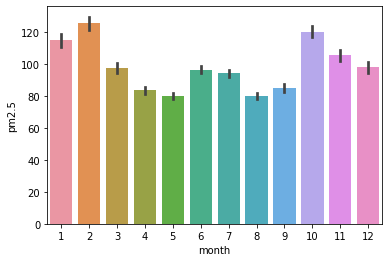

In [21]:
sns.barplot(x='month', y='pm2.5', data=df2)

<AxesSubplot:xlabel='hour', ylabel='pm2.5'>

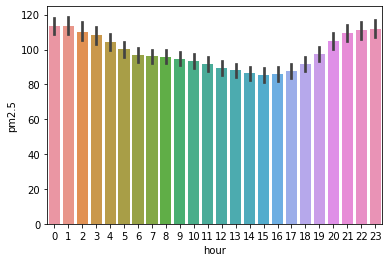

In [22]:
sns.barplot(x='hour', y='pm2.5', data=df2)

<AxesSubplot:xlabel='cbwd', ylabel='pm2.5'>

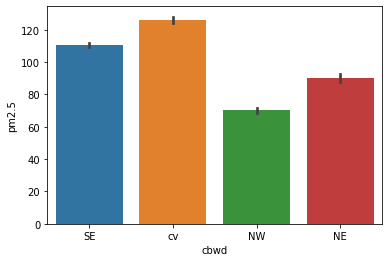

In [23]:
sns.barplot(x='cbwd', y='pm2.5', data=df2)

# Modeling

In [24]:
cols = quant_cols+qual_cols
cols.remove('pm2.5')
X,y = np.array(df2[cols]), np.array(df2["pm2.5"])

In [25]:
X[0:2,:]

array([[-1.60e+01, -4.00e+00,  1.02e+03,  1.79e+00,  0.00e+00,  0.00e+00,
         1.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  1.00e+00,  0.00e+00],
       [-1.50e+01, -4.00e+00,  1.02e+03,  2.68e+00,  0.00e+00,  0.00e+00,
         1.00e+00,  1.00e+00,  0.00e+00,  0.00e+00,  1.00e+00,  0.00e+00]])

In [26]:
X.shape

(41757, 12)

In [27]:
np.random.seed(1)
train_idx=np.random.choice(41757,31757,replace=False)
test_idx = np.array(list(set(range(41757))-set(train_idx))) #Take 10000 samples as the test set.

In [28]:
X_train = X[train_idx,]
y_train = y[train_idx,]

X_test = X[test_idx,]
y_test = y[test_idx,]

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31757, 12)
(10000, 12)
(31757,)
(10000,)


## 0. Base (mean of y_train)

In [30]:
np.sqrt(np.mean((y_test-np.mean(y_train))**2)) #base (y_mean)

93.37689990778144

## 1. OLS

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
ols_regr = LinearRegression()
ols_regr.fit(X_train,y_train)

LinearRegression()

In [33]:
ols_pred = ols_regr.predict(X_test)

In [34]:
ols_pred[ols_pred<0,]=0
ols_pred

array([ 43.44065755, 178.57921986,  67.07205565, ..., 131.9691329 ,
        56.35336049,  40.32194833])

In [35]:
np.sqrt(np.mean((y_test-ols_pred)**2))

79.23636933768614

In [36]:
ols_regr.coef_

array([  4.40215676,  -6.58870573,  -1.61106348,  -0.20029049,
        -4.12796092,  -6.32214068,  -1.15246671,   1.32612634,
       -11.72228683, -14.11758984,  13.0342684 ,  12.80560827])

## 2. RandomForest

In [37]:
from sklearn.ensemble import RandomForestRegressor
import time

In [38]:
rf_regr = RandomForestRegressor(n_estimators=500, criterion='mse', max_features=4, n_jobs=-1, random_state=0)

In [39]:
start=time.time()
rf_regr.fit(X_train,y_train)
print(time.time()-start) #one implementation, about 15 seconds

16.406617403030396


In [40]:
rf_pred = rf_regr.predict(X_test)

In [41]:
rf_pred[rf_pred<0,]=0
rf_pred

array([ 32.594, 180.072,  18.088, ..., 175.024,  36.154,  25.918])

In [42]:
np.sqrt(np.mean((y_test-rf_pred)**2))

54.91833675909555

In [43]:
# 튜닝

param_grid = {'n_estimators':[500,1000,1500,2000],
             'max_features':[2,4,6,8,10,12]}

In [44]:
expected_time = 4*6*5*15
print(expected_time/60) #30mins

30.0


In [45]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(rf_regr,param_grid,cv=5,scoring='neg_root_mean_squared_error') 

In [44]:
grid_search.fit(X_train,y_train) # it may take 30 mins.

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=4, n_estimators=500,
                                             n_jobs=-1, random_state=0),
             param_grid={'max_features': [2, 4, 6, 8, 10, 12],
                         'n_estimators': [500, 1000, 1500, 2000]},
             scoring='neg_root_mean_squared_error')

In [45]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 2000}

In [46]:
grid_search.best_score_

-54.367712944460585

In [47]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head(5))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.246923,2.948601,0.555630,0.055821,2,500,"{'max_features': 2, 'n_estimators': 500}",-59.259871,-58.038878,-60.189908,-59.472687,-58.940318,-59.180333,0.703074,24
1,21.131085,0.158219,1.034792,0.028857,2,1000,"{'max_features': 2, 'n_estimators': 1000}",-59.127964,-58.012705,-60.117883,-59.408901,-58.844824,-59.102455,0.689867,23
2,34.316474,4.530224,1.586386,0.088186,2,1500,"{'max_features': 2, 'n_estimators': 1500}",-59.102795,-57.969256,-60.130077,-59.341624,-58.863323,-59.081415,0.700331,22
3,50.064408,6.488243,2.431167,0.381412,2,2000,"{'max_features': 2, 'n_estimators': 2000}",-59.073619,-57.982308,-60.122460,-59.322955,-58.881232,-59.076515,0.691399,21
4,14.121634,0.411097,0.543017,0.039409,4,500,"{'max_features': 4, 'n_estimators': 500}",-56.417897,-55.196058,-57.473388,-56.882318,-56.328091,-56.459550,0.751270,20


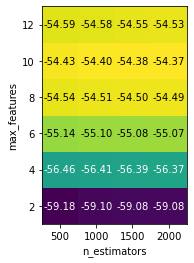

In [48]:
import mglearn

scores=np.array(results.mean_test_score).reshape(6,4)

mglearn.tools.heatmap(scores,xlabel='n_estimators', xticklabels=param_grid['n_estimators'], ylabel='max_features',yticklabels=param_grid['max_features'],cmap='viridis')

In [49]:
rft_pred = grid_search.predict(X_test)

In [50]:
rft_pred[rft_pred<0,]=0
rft_pred

array([ 41.407 , 214.9665,  18.566 , ..., 206.4885,  32.243 ,  25.8585])

In [51]:
np.sqrt(np.mean((y_test-rft_pred)**2))

52.94212291306083

## 3. SVM (RBF kernel)

In [46]:
from sklearn.svm import SVR

In [47]:
#Implement normalization for svm
Xn_train = X_train-np.min(X_train,axis=0)
Xn_train = Xn_train/(np.max(X_train,axis=0)-np.min(X_train,axis=0))

Xn_test = X_test-np.min(X_train,axis=0)
Xn_test = Xn_test/(np.max(X_train,axis=0)-np.min(X_train,axis=0))

In [48]:
svm_regr = SVR(kernel='rbf',C=2**-3, gamma=2**3)

In [49]:
start=time.time()
svm_regr.fit(Xn_train,y_train)
print(time.time()-start) #one implementation, about 90 seconds... too much!

84.24804162979126


In [50]:
start=time.time()
svm_pred = svm_regr.predict(Xn_test) 
print(time.time()-start) #inference is also demanding, about 50 seconds...

63.24684286117554


In [51]:
svm_pred[svm_pred<0,]=0
svm_pred

array([55.38548456, 85.88205656, 63.85062897, ..., 77.50121515,
       55.14311824, 53.71417643])

In [52]:
np.sqrt(np.mean((y_test-svm_pred)**2))

92.92957249195851

In [ ]:
# 튜닝

param_grid = {'C':[2**4.75,2**5,2**5.25,2**5.5,2**5.75],
             'gamma':[2**6.25,2**6.5,2**6.75,2**7,2**7.25]} #coarse tuning -> fine tuning

In [53]:
(65+85)*25*5/60 #312mins !! it's too much

312.5

In [55]:
(65+85)*25*2/60

125.0